# Implement a VGG13 for MNIST classification
Follow tutorial from  https://medium.com/@amir_hf8/implementing-vgg13-for-mnist-dataset-in-tensorflow-abc1460e2b93.
But, it is implemented in tf 1, many code does not work in tf 2.

There is a blog explain th vgg13 well: https://blog.csdn.net/malele4th/article/details/79404731

The original english version is here: https://towardsdatascience.com/understand-the-architecture-of-cnn-90a25e244c7

Another english article explains VGG: https://medium.com/@singole/an-extensive-guide-to-convolution-neural-network-2023-84872b16bd78

StackExchange: https://ai.stackexchange.com/questions/9870/how-are-the-dimensions-of-the-feature-maps-produced-by-the-convolutional-layer-d 


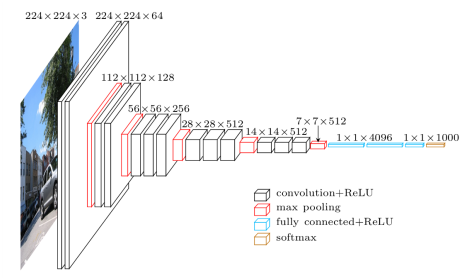

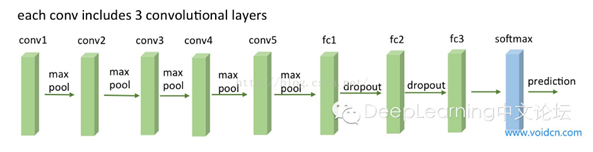

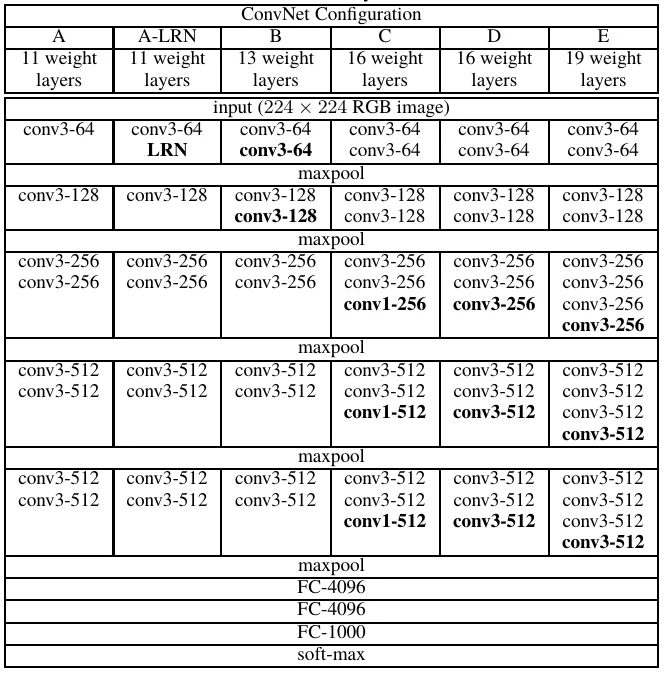

This is a new implementation of VGG13 Convolutional Neural network with the new TensorFlow APIs (TensorFlow > v1.4)

# Key take aways
1. [深入浅出PyTorch](https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E9%9B%B6%E7%AB%A0/index.html)
1. [TensorFlow中文官方教程](https://www.tensorflow.org/tutorials?hl=zh-cn)
1. sklearn.datasets.fetch_openml, load data from https://www.openml.org/d/554
   ~~~python
       # load data from https://www.openml.org/d/554
        X, y = fetch_openml("mnist_786", version=1, return_X_y=True, as_frame=False)
   ~~~
1. Load from keras:
   ~~~python
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
   ~~~
1. 卷积层串联. https://blog.csdn.net/chang_jx/article/details/132259340
    1. 两个3*3的卷积层串联相当于一个5*5的卷积层.即一个像素会更周围5*5的像素产生关联，感受野大小为5*5.
1. 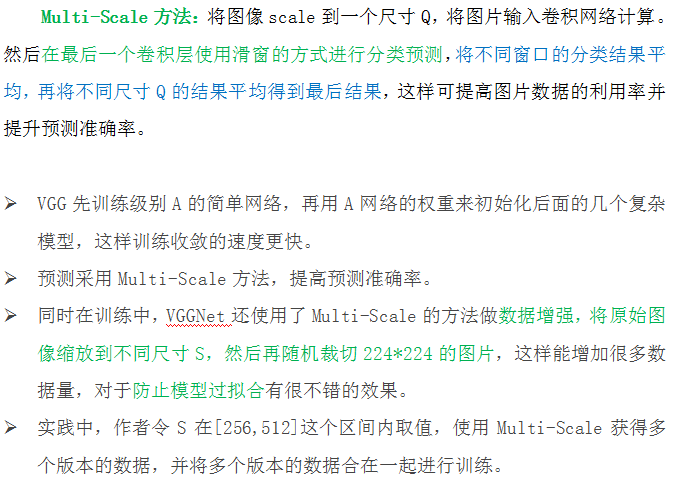
1. 1X1的卷积核也是很有效的，但是没有3X3的卷积效果好.
1. 卷积核，别名“过滤器”、“特征提取器”。特征映射，别名“特征图”。
1. 一个卷积层由一组卷积核组成。
1. [2023了，学习深度学习框架哪个比较好？](https://www.cnblogs.com/ZOMI/p/17561719.html), PyTorch, Tensorflow是王者. Keras被Tensorflow吸收了, 成为其高级API。其它框架都逐渐停止了开发.
1. [The Deep Learning with PyTorch Workshop: Build deep neural networks and artificial intelligence applications with PyTorch](https://github.com/PacktWorkshops/The-Deep-Learning-with-PyTorch-Workshop)
1. [Convolutional Neural Network](https://pytorch-tutorial.readthedocs.io/en/latest/tutorial/chapter02_basics/2_4_convolutional-neural-network/), 中文，有pytorch代码
![image-3.png](https://pytorch-tutorial.readthedocs.io/en/latest/tutorial/chapter02_basics/img/9.gif)
   **这是为何VGG里面每层用两个Conv2D的原因**
   ~~~
   VGG清一色用小卷积核，结合作者和自己的观点，这里整理出小卷积核比用大卷积核的优势：
    
    根据作者的观点，input8 -> 3层conv3x3后，output=2，等同于1层conv7x7的结果； input=8 -> 2层conv3x3后，output=2，等同于2层conv5x5的结果. 

    卷积层的参数减少。相比5x5、7x7和11x11的大卷积核，3x3明显地减少了参数量
   ~~~
   **各种网络的准确率和计算量之间的对比:**
   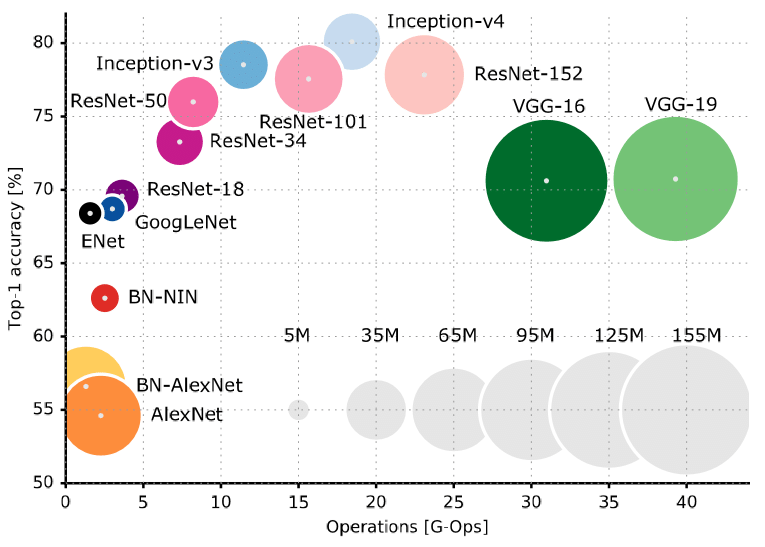
1.

In [28]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn import datasets, fetch_openml
from sklearn.model_selection import train_test_split

# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1)

ImportError: cannot import name 'fetch_openml' from 'sklearn' (/Users/andrewy/anaconda3/envs/little_ai_zoo/lib/python3.11/site-packages/sklearn/__init__.py)

In [23]:
from sklearn.datasets import load_digits, fetch_openml
from sklearn.utils import check_random_state
# Loading the data (MNIST)
# mnist = tf.contrib.learn.datasets.load_dataset("mnist")
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# Split data into 50% train and 50% test subsets
train_data, eval_data, train_labels, eval_labels = train_test_split(
data, digits.target, test_size=0.5, shuffle=False
)

# load data from https://www.openml.org/d/554
# X, y = fetch_openml("mnist_786", version=1, return_X_y=True, as_frame=False)

# load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

train_samples = 5000
random_state = check_random_state(0) # Turn seed into a np.random.RandomState instance.
permutation = random_state.permutation(X.shape[0]) # Randomly permute a sequence, or return a permuted range.
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

# train_data = mnist.train.images  # Returns np.array
# train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
# eval_data = mnist.test.images  # Returns np.array
# eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

y = 7


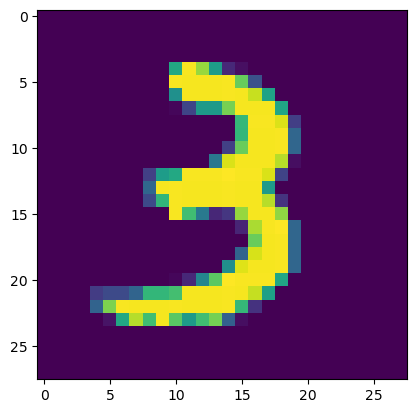

In [24]:
index = 7
plt.imshow(X_train[index].reshape(28, 28))
print ("y = " + str(np.squeeze(train_labels[index])))

In [26]:
print ("number of training examples = " + str(train_data.shape[0]))
print ("number of evaluation examples = " + str(eval_data.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 898
number of evaluation examples = 899
X_train shape: (5000, 784)
Y_train shape: (5000,)
X_test shape: (10000, 784)
Y_test shape: (10000,)


# module 'tensorflow' has no attribute 'logging'

**Solution:**

tf.logging was for Logging and Summary Operations and in TF 2.0 it has been removed in favor of the open-source absl-py, and to make the main tf.* namespace has functions that will be used more often.

In TF.2 lesser used functions are gone or moved into sub-packages like tf.math

So instead of tf.logging you could:

tf_upgrade_v2 will upgrade script and changes tf.logging to tf.compat.v1.logging
Python logging module can be used instead
Import absl-py library

**Fix:**

removing loging code.

# AttributeError: module 'tensorflow' has no attribute 'contrib'
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

The contrib library was removed out of tensorflow 2.0.

**Solution**:

1. Use sklearn data instead.
